In [1]:
#import library
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud

import pandas as pd
import numpy as np 
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
#import csv file
df = pd.read_csv('OnlineLearning_Dataset.csv')
df

,User,Tweet
0,UUMcampusalert,Network Outage in INASIS BSN\n\nThere is a net...
1,orionastarmoon,@thecounciltale @BBCBreaking @BBCNews The majo...
2,akwfalcon1,@J_Hurstman @RepLisaMcClain As a teacher my as...
3,Melissa22461016,@RepLisaMcClain All 50 states have their stand...
4,GreigNicol1,Timely online opportunity to update learning o...
...,...,...
2495,KaushikLele,@fivefeetaparth @CulerFDJ Easily learn Gujarat...
2496,pereiraevabc,#Eedi |= Eedi (https://t.co/HwECaPZZLk) very I...
2497,HouraiHimmler,this online learning module is evil b/c i can'...
2498,kodesc,#LEARN Complete Guide to Front-End Web Develop...


In [3]:
#data cleaning

#function for data cleaning
def cleanText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #remove mentions
    text = re.sub(r'#', '', text) #remove hashtag
    text = re.sub(r'RT[\s]+', '', text) #remove retweet
    text = re.sub(r'https?:\/\/\S+', '', text) #remove links
    
    return text

#cleaning the dataset
df['Tweet']=df['Tweet'].apply(cleanText)

#show cleaned dataframe
df

,User,Tweet
0,UUMcampusalert,Network Outage in INASIS BSN\n\nThere is a net...
1,orionastarmoon,"The majority will suffer even kids, losing ..."
2,akwfalcon1,"_Hurstman As a teacher my assignments, etc we..."
3,Melissa22461016,All 50 states have their standards posted onl...
4,GreigNicol1,Timely online opportunity to update learning o...
...,...,...
2495,KaushikLele,Easily learn Gujarati from my tutorial . Ma...
2496,pereiraevabc,Eedi |= Eedi ( very Interesting online mathema...
2497,HouraiHimmler,this online learning module is evil b/c i can'...
2498,kodesc,LEARN Complete Guide to Front-End Web Developm...


In [4]:
#function for getting subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#function for getting polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [5]:
#create subjectivity and polarity columns
df['Subjectivity'] = df['Tweet'].apply(getSubjectivity)
df['Polarity'] = df['Tweet'].apply(getPolarity)

#show new dataframe
df

,User,Tweet,Subjectivity,Polarity
0,UUMcampusalert,Network Outage in INASIS BSN\n\nThere is a net...,0.466667,-0.125000
1,orionastarmoon,"The majority will suffer even kids, losing ...",0.512500,-0.168750
2,akwfalcon1,"_Hurstman As a teacher my assignments, etc we...",0.500000,0.000000
3,Melissa22461016,All 50 states have their standards posted onl...,0.300000,0.000000
4,GreigNicol1,Timely online opportunity to update learning o...,0.533333,0.255556
...,...,...,...,...
2495,KaushikLele,Easily learn Gujarati from my tutorial . Ma...,0.711111,0.444444
2496,pereiraevabc,Eedi |= Eedi ( very Interesting online mathema...,0.650000,0.650000
2497,HouraiHimmler,this online learning module is evil b/c i can'...,1.000000,-1.000000
2498,kodesc,LEARN Complete Guide to Front-End Web Developm...,0.400000,0.100000


<function matplotlib.pyplot.show(close=None, block=None)>

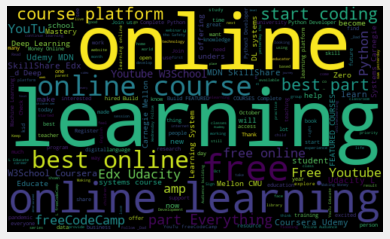

In [6]:
#word cloud
allWords = ''.join([twts for twts in df['Tweet']])
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 120).generate(allWords)

plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show

In [7]:
#function to compute negative, neutral and positive analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

#computing the value
df['Analysis'] = df['Polarity'].apply(getAnalysis)

#show dataframe
df

,User,Tweet,Subjectivity,Polarity,Analysis
0,UUMcampusalert,Network Outage in INASIS BSN\n\nThere is a net...,0.466667,-0.125000,Negative
1,orionastarmoon,"The majority will suffer even kids, losing ...",0.512500,-0.168750,Negative
2,akwfalcon1,"_Hurstman As a teacher my assignments, etc we...",0.500000,0.000000,Neutral
3,Melissa22461016,All 50 states have their standards posted onl...,0.300000,0.000000,Neutral
4,GreigNicol1,Timely online opportunity to update learning o...,0.533333,0.255556,Positive
...,...,...,...,...,...
2495,KaushikLele,Easily learn Gujarati from my tutorial . Ma...,0.711111,0.444444,Positive
2496,pereiraevabc,Eedi |= Eedi ( very Interesting online mathema...,0.650000,0.650000,Positive
2497,HouraiHimmler,this online learning module is evil b/c i can'...,1.000000,-1.000000,Negative
2498,kodesc,LEARN Complete Guide to Front-End Web Developm...,0.400000,0.100000,Positive


In [8]:
#print all positive tweets
j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
    if(sortedDF['Analysis'][i] == 'Positive'):
        print(str(j)+')'+sortedDF['Tweet'][i])
        print()
        j = j+1

1)Timely online opportunity to update learning on clean sport. 
💊 
Relevant to athletes, support and medical staff. sportsmedicine 

2): The  is exploring the need for free or low-cost Universal PreKindergarten (UPK) curriculum and related resources…

3)Be You Connected Communities are online spaces for educators to come together and explore ways to promote positive, inclusive and resilient learning communities. Each community is unique. Read more about them here:  ECAConference 

4)  The students connected via an online learning platform &amp; it sounds like they got each other going &amp; created something of a mob (hence why a group petition). Some classes are just hard. They aren’t a “good” or fun experience but so what? These are adults, not kindergartners.

5): freeCodeCamp is the best online course platform to start coding in Python.

The best part?

Everything is free on YouTu…

6)  I do think there’s an entire generation that got messed up due to the ease of access to sexual m

Not by reading a bunch of books on the theory of money

384)_centre: + ONLINE TEACHER PROFESSIONAL LEARNING +

- Enhancing Creativity using Adobe Express
- Barefoot Computational Thinking 
-…

385)_Wichita: WomenInBusiness: Scale new heights with Ascent, SBA's free online learning platform! Learn about marketing, access to cap…

386)_Education: 🐭 Why study the molecular effects of a mutation in genetically engineered mice? Enroll in the new  Online Mic…

387)_d: Deep Learning Systems 2022 - Carnegie Mellon

CMU is offering a DL systems course for free online. The course is about unders…

388)Providing culturally safer care is an important component of embedding palliativecare approaches into paramedicine and healthcare. Great resources from   on The Learning Hub -  free, online, certificates of completion 

389): 5 Top PDF Plagiarism Checkers Online Free For Students  education english facts learning

390)We are learning how to be safe online and  class knows that MyOn is a safe websit


748)_the: If you are interested in learning Solar Installation Job or you want to become an agent, slide up to join group, Training i…

749): freeCodeCamp is the best online course platform to start coding in Python.

The best part?

Everything is free on YouTu…

750): freeCodeCamp is the best online course platform to start coding in Python.

The best part?

Everything is free on YouTu…

751)Our home city yeg has been named Canada's first UNESCO LearningCity

Truly proud of having been part of the production team for the Indigenous Canada online course, cited as one of the initiatives contributing to Edmonton's Learning City status.



752)_the: If you are interested in learning Solar Installation Job or you want to become an agent, slide up to join group, Training i…

753)The pros and cons of online learning.

Follow   for more updates
.
.
.
.
onlinecoach onlinelearning onlineclasses onlineclass students learning education degree knowledge career careertips cv hiring hyderabad usa i


1154)_rox_ Also did mine virtually - part time/online vs full time is a big decision too. If you find an online or part time program that’s robust enough and provides good experiential learning opportunities, I’d recommend that (vs total cost of full time + not working full time during)

1155)Online course on behalf of the National Centre for Learning Welsh - overview of life in Wales + the Welsh language to individuals who are new to Wales

Will be available in 5 languages!

Looking for:

*Professional level translators in the Ukrainian Language*

translators 

👇🏻 

1156)_Dad: It's Wednesday...

Follow _Dad and continue learning more on;

• Making Money Online 
• Audience building…

1157): Habits of successful content creators/online entrepreneurs: 

1. Learning new trends and news in your niche/industry da…

1158): Educate yourself Online for Free

1. Youtube
2. W3School
3. Coursera
4. Udemy
5. MDN
6. SkillShare
7. Edx
8. Udacity
9. L…

1159)Kolb's Learning Cycle⬇️ 

🔵 Easy to use &

9. L…

1530): freeCodeCamp is the best online course platform to start coding in Python.

The best part?

Everything is free on YouTu…

1531)BMJ Learning offers high quality continuing medical education for doctors &amp; healthcare professionals  Gain CME/CPD points for your time spent learning. OpenAthens account required, register today  LibrariesWeek NeverStopLearning 🖥️ 

1532): freeCodeCamp is the best online course platform to start coding in Python.

The best part?

Everything is free on YouTu…

1533): Your first step to a vast range of knowledge online is your Open Athens account. Register here:  

1534): Educate yourself Online for Free

1. Youtube
2. W3School
3. Coursera
4. Udemy
5. MDN
6. SkillShare
7. Edx
8. Udacity
9. L…

1535): If you're hustling online (legally):

Don't listen to anyone that tells you to stop.

Keep doing what you're doing.

Keep le…

1536)_d: Deep Learning Systems 2022 - Carnegie Mellon

CMU is offering a DL systems course for free online. The course is

In [9]:
#print all negative tweets
j=1
sortedDF = df.sort_values(by=['Polarity'], ascending='False')
for i in range(0, sortedDF.shape[0]):
    if(sortedDF['Analysis'][i] == 'Negative'):
        print(str(j)+')'+sortedDF['Tweet'][i])
        print()
        j = j+1

1)Network Outage in INASIS BSN

There is a network outage currently in INASIS BSN. Due to this problem, you are not able to access UUM Email, UUMWiFi, UUM Portal &amp; UUM Online Learning.

We will keep you updated on the situation.

2)   The majority will suffer even kids, losing money, medical equipment unable to work, unable to cook, keep warm, online learning. EVERYTHING will be cut off and 3hrs is a long time when you’re cold, hungry, near death, losing money and behind on education 😤

3)I am often baffled at how students are expected to traipse through adverse weather conditions in countries and areas prone to flood as though FOR THE LAST TWO YEARS WE DID NOT TRANSITION TO ONLINE LEARNING? 

YALL END THE GOOGLE CLASSROOM SUBSCRIPTION? 

4): Post-secondary can be a challenge for students with ADHD and other learning disabilities, two UCalgary researchers say the s…

5)Unmmm,  this is already in place by Divisions in the province after the government decentralized it👇🏽👇🏽👇🏽. What a 

In [10]:
#percentage of positive tweets
ptweets = df[df.Analysis=='Positive']
ptweets = ptweets['Tweet']

round((ptweets.shape[0] / df.shape[0])*100, 1)

72.6

In [11]:
#percentage of negative tweets
ptweets = df[df.Analysis=='Negative']
ptweets = ptweets['Tweet']

round((ptweets.shape[0] / df.shape[0])*100, 1)

6.3

<function matplotlib.pyplot.show(close=None, block=None)>

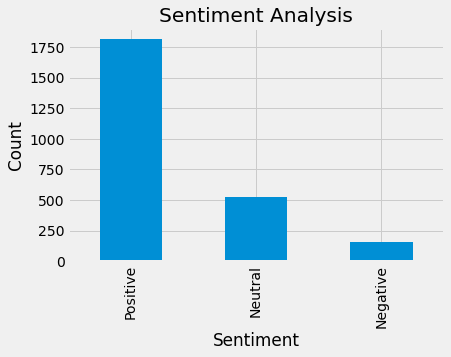

In [12]:
#show the value counts
df['Analysis'].value_counts()

#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Count')
df['Analysis'].value_counts().plot(kind='bar')
plt.show